In [18]:
import os
import SimpleITK as sitk
import numpy as np
from utils import *
from convertRaw import *

## Plastimatch Parameters
- Normal vector set to 1x,0y,0z or left to right (--nrm)
- Dectector up vector set to 0x,0x,1z (--vup)
- Reconstructed image dimensions 725 by 426 to match gvxr projection (-r)
- Detector size adjusted for spacing $725\times0.625$ by $426\times0.7$ (-z)
- Output type raw (-t)
- Source to detector and source to object set effectively to infinity, mimicking a parellel detector (--sid and --sad)

In [54]:
os.system('plastimatch drr --nrm "1 0 0" --vup "0 0 1" -r "725 426" -c "1111 -57" -z "453.125 298.5" -t raw --sid 32767 --sad 32767 --output Plastimatch_data/lungman_DRR lungman_data/lungman.mha');

In [55]:
#os.system('python convertRaw.py "Plastimatch_data/lungman_DRR0000.raw" "Plastimatch_data/lungman_DRR.mha" "false" "sitkFloat32" 725 426');

image_DRR = read_raw(binary_file_name="Plastimatch_data/lungman_DRR0000.raw",
                 image_size=[725, 426],
                 sitk_pixel_type=sitk.sitkFloat32,
                 big_endian="false");

image_DRR = np.array(sitk.GetArrayFromImage(image_DRR));

[b'ObjectType = Image\n', b'NDims = 2\n', b'DimSize = 725 426\n', b'ElementSpacing = 1 1\n', b'Offset = 0 0\n', b'TransformMatrix = 1 0 0 1\n', b'ElementType = MET_FLOAT\n', b'BinaryData = True\n', b'BinaryDataByteOrderMSB = false\n', b'ElementDataFile = C:\\gvxr\\notebooks\\Plastimatch_data\\lungman_DRR0000.raw\n']


In [56]:
#----------------------------------------------------REMEMBER TO CHANGE THIS TO TIFF AND USE IMREAD
sitk_reader = sitk.ImageFileReader();
sitk_reader.SetImageIO("MetaImageIO");

sitk_reader.SetFileName("gVirtualXRay_output_data/gvxr_lungman_1-0-0_radiograph_normalised_402.mha");
image_gvxr = np.array(sitk.GetArrayFromImage(sitk_reader.Execute()));

min = np.min(image_DRR);
max = np.max(image_DRR);
image_DRR -= min;
image_DRR /= (max -min);

image_gvxr[image_gvxr < 0.00001] = 0.00001;
image_DRR[image_DRR < 0.00001] = 0.00001;

print(np.min(image_DRR))
print(np.max(image_DRR))
print(np.min(image_gvxr))
print(np.max(image_gvxr))

print(np.mean(image_gvxr));
print(np.mean(image_DRR));


1e-05
1.0
1e-05
1.0036262
0.23936102
0.24296817


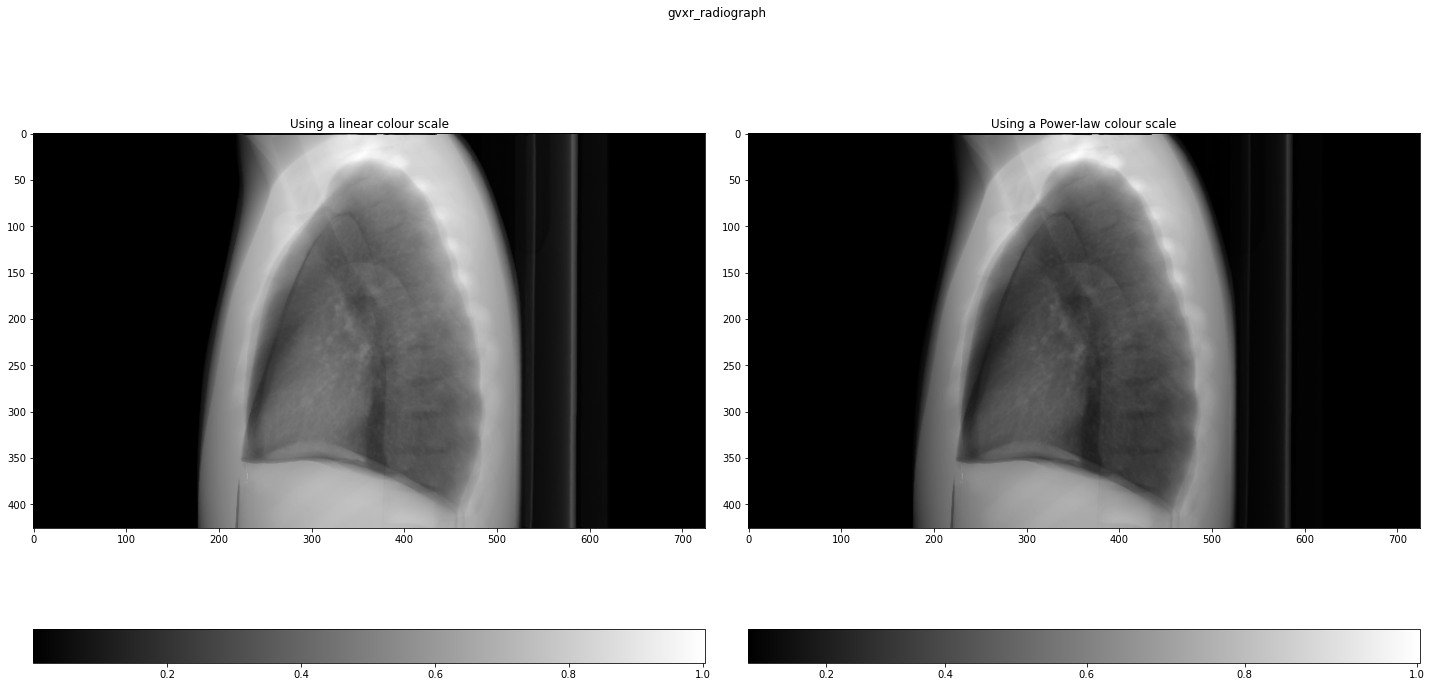

In [57]:
displayLinearPowerScales(image_gvxr, "gvxr_radiograph", "plots/lungman_gvxr_radiograph")

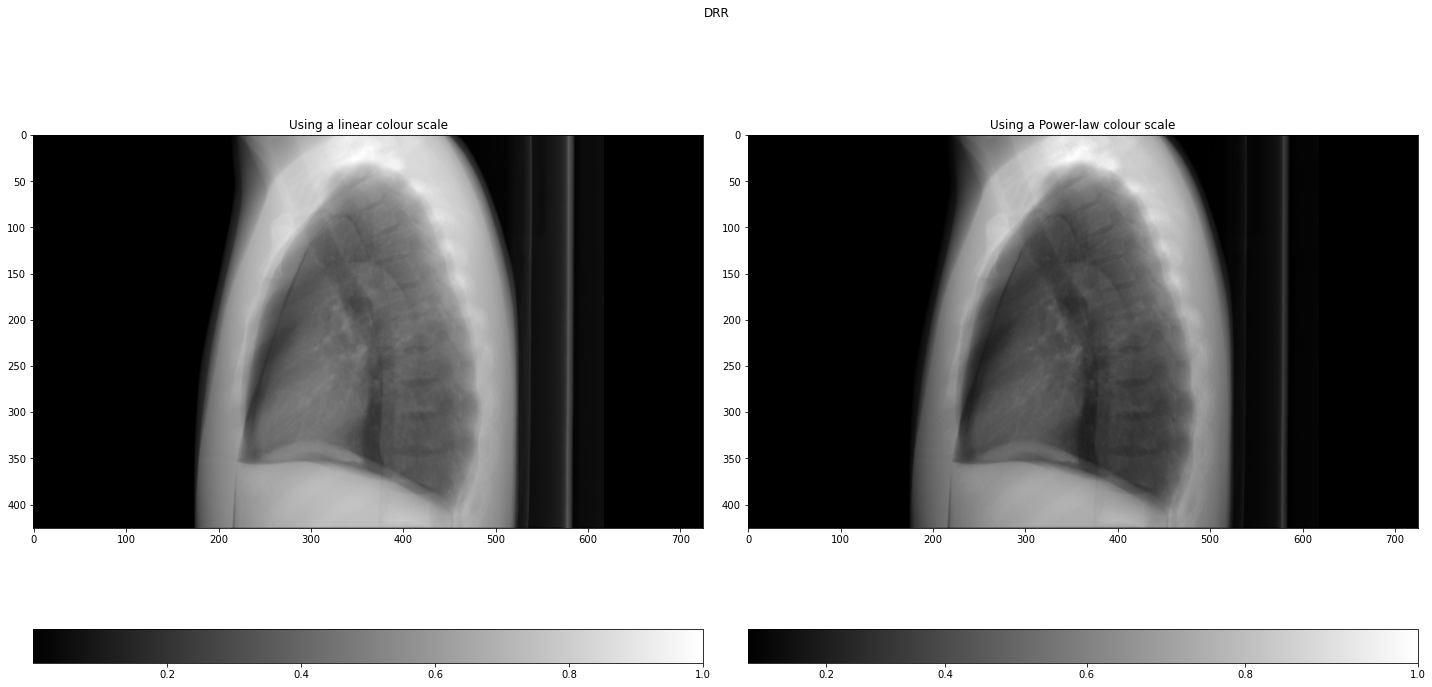

In [58]:
displayLinearPowerScales(image_DRR, "DRR", "plots/lungman_DRR")

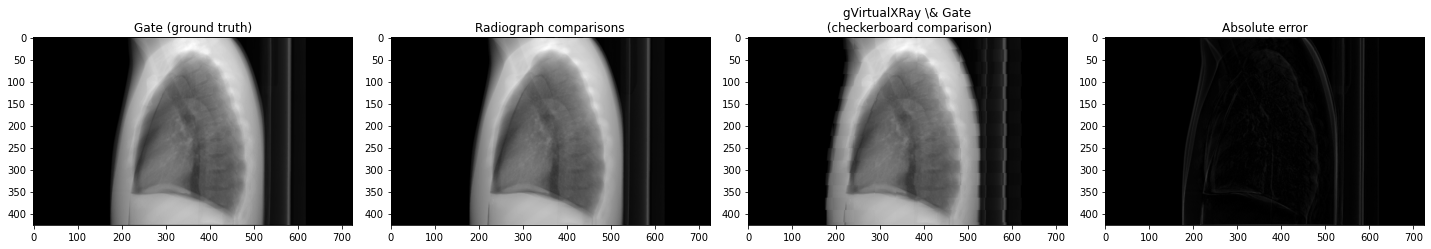

In [59]:
fullCompareImages(image_DRR, image_gvxr, "Radiograph comparisons","plots/lungman_full_comparison_radiographs");